# Data prep for the Multi-Label Neural Network

## Part 1 - Data Prep

### ImageDataGen 
### flow_from_dataframe 


## Part 2  - Data Augment 



## Part 3  - Neural Network 



#### Updated: May 14, 2019
#### By: Patrick L. Cavins 

In [38]:
##import libraries 

#dataprep
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np 

##keras stuff 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

#saving prediction output 
import pickle

#graphing
import matplotlib.pyplot as plt

## Data Prep

### Import the dataframe from csv

In [3]:
image_df = pd.read_csv('./data_multi_label/full_image_df.csv')
image_df = image_df.drop(columns='Unnamed: 0')

image_df.head()

image_df.image_saved_as = image_df.image_saved_as.apply(lambda x: x +'.png')

In [4]:
print (image_df.shape)

print ("--"*25)
print ('Confirming the status of null values in the dataframe')

print (image_df.isnull().sum())

print ("--"*25)

print ('The current break break down of this multi-label classifcation problem')

print (image_df.sum())

(2313, 17)
--------------------------------------------------
Confirming the status of null values in the dataframe
AKA               0
AKE               0
AKH               0
AKY               0
ALC               0
AMN               0
BNZ               0
COC               0
COH               0
COO               0
COONH2            0
KEY               0
OH                0
SHH               0
cid               0
image_saved_as    0
ring              0
dtype: int64
--------------------------------------------------
The current break break down of this multi-label classifcation problem
AKA                                                            1346
AKE                                                             249
AKH                                                             222
AKY                                                             189
ALC                                                              38
AMN                                                             325
B

### train_test_split 

- We are initially only going to select some features from the dataframe to build the first iteration of the neural network
    - We are going to be using the following columns, 'AKA', 'AKE', 'ring', 'BNZ'

In [5]:
# Setting up the Train/Test/Split

#features for the neural network, in this case this is what we are trying to predict
features = ['ring', 'BNZ', 'AKA', 'AKE']

#this will be aliased as y_col later, needed for the flow_from_dataframe
X = image_df[features]

#this will be aliases as x_col later, needed for the flow_from_dataframe 
y = image_df['image_saved_as']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
X_train.head()

,ring,BNZ,AKA,AKE
1303,1.0,0.0,0.0,1.0
1751,1.0,1.0,0.0,0.0
1962,0.0,0.0,1.0,1.0
1447,1.0,1.0,0.0,0.0
1653,1.0,0.0,1.0,0.0


In [8]:
X_train['label'] = X_train[X_train.columns[:]].apply(lambda x: ','.join(x.astype('str')), 
                                                   axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
X_test['label'] = X_test[X_test.columns[:]].apply(lambda x: ','.join(x.astype('str')), 
                                                   axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Concat the DFs back together! 

In [10]:
full_test_df = pd.concat([X_test, y_test], axis=1)

full_test_df.head()

,ring,BNZ,AKA,AKE,label,image_saved_as
1100,1.0,1.0,1.0,0.0,"1.0,1.0,1.0,0.0",4_tert_butylbenzoic_acid_8167110.png
917,0.0,1.0,0.0,1.0,"0.0,1.0,0.0,1.0",phenyl_vinyl_sulfoxide_5370672.png
622,1.0,1.0,0.0,0.0,"1.0,1.0,0.0,0.0",benzamide_522832.png
269,1.0,1.0,0.0,0.0,"1.0,1.0,0.0,0.0",diphenyl_ether_20298601.png
1347,1.0,1.0,1.0,0.0,"1.0,1.0,1.0,0.0",3_butynyl_tosylate_20501275.png


In [11]:
full_train_df = pd.concat([X_train, y_train], axis=1)

full_train_df.head()

,ring,BNZ,AKA,AKE,label,image_saved_as
1303,1.0,0.0,0.0,1.0,"1.0,0.0,0.0,1.0",thiophene_87460260.png
1751,1.0,1.0,0.0,0.0,"1.0,1.0,0.0,0.0",metanilamide_7377.png
1962,0.0,0.0,1.0,1.0,"0.0,0.0,1.0,1.0",isoprene_10582734.png
1447,1.0,1.0,0.0,0.0,"1.0,1.0,0.0,0.0",benzaldehyde_20447206.png
1653,1.0,0.0,1.0,0.0,"1.0,0.0,1.0,0.0",hexanoic_acid_87093515.png


### Making The Label List

In [12]:
## Training for loop... 

label_list = []
for entry in full_train_df['label']:
#     print (entry)
    new_label = list(entry)
    label_list.append(new_label)
    
full_train_df['label_list'] = label_list    

In [13]:
type(full_train_df['label_list'][0])

list

In [14]:
full_train_df.head()

,ring,BNZ,AKA,AKE,label,image_saved_as,label_list
1303,1.0,0.0,0.0,1.0,"1.0,0.0,0.0,1.0",thiophene_87460260.png,"[1, ., 0, ,, 0, ., 0, ,, 0, ., 0, ,, 1, ., 0]"
1751,1.0,1.0,0.0,0.0,"1.0,1.0,0.0,0.0",metanilamide_7377.png,"[1, ., 0, ,, 1, ., 0, ,, 0, ., 0, ,, 0, ., 0]"
1962,0.0,0.0,1.0,1.0,"0.0,0.0,1.0,1.0",isoprene_10582734.png,"[0, ., 0, ,, 0, ., 0, ,, 1, ., 0, ,, 1, ., 0]"
1447,1.0,1.0,0.0,0.0,"1.0,1.0,0.0,0.0",benzaldehyde_20447206.png,"[1, ., 0, ,, 1, ., 0, ,, 0, ., 0, ,, 0, ., 0]"
1653,1.0,0.0,1.0,0.0,"1.0,0.0,1.0,0.0",hexanoic_acid_87093515.png,"[1, ., 0, ,, 0, ., 0, ,, 1, ., 0, ,, 0, ., 0]"


In [15]:
## testing loop 

label_list = []
for entry in full_test_df['label']:
#     print (entry)
    new_label = list(entry)
    label_list.append(new_label)
    
full_test_df['label_list'] = label_list

In [16]:
full_test_df.head()

,ring,BNZ,AKA,AKE,label,image_saved_as,label_list
1100,1.0,1.0,1.0,0.0,"1.0,1.0,1.0,0.0",4_tert_butylbenzoic_acid_8167110.png,"[1, ., 0, ,, 1, ., 0, ,, 1, ., 0, ,, 0, ., 0]"
917,0.0,1.0,0.0,1.0,"0.0,1.0,0.0,1.0",phenyl_vinyl_sulfoxide_5370672.png,"[0, ., 0, ,, 1, ., 0, ,, 0, ., 0, ,, 1, ., 0]"
622,1.0,1.0,0.0,0.0,"1.0,1.0,0.0,0.0",benzamide_522832.png,"[1, ., 0, ,, 1, ., 0, ,, 0, ., 0, ,, 0, ., 0]"
269,1.0,1.0,0.0,0.0,"1.0,1.0,0.0,0.0",diphenyl_ether_20298601.png,"[1, ., 0, ,, 1, ., 0, ,, 0, ., 0, ,, 0, ., 0]"
1347,1.0,1.0,1.0,0.0,"1.0,1.0,1.0,0.0",3_butynyl_tosylate_20501275.png,"[1, ., 0, ,, 1, ., 0, ,, 1, ., 0, ,, 0, ., 0]"


## Part 2:  Data Augment 

In [17]:
#Instantiate 
train_datagen = ImageDataGenerator(rotation_range = 30, #shear
                                   rescale=1./255)
                                   
test_datagen = ImageDataGenerator(rotation_range=30,
                                  rescale=1./255)

# datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)


In [36]:
#We need to fit the ImageDataGenerator Class to the X_train, X_test... ect.

#Starting off with X_train/y_train => They are flipped 

batch = 16

training_generator = train_datagen.flow_from_dataframe(
    full_train_df, 
    directory = './images_multi_label/',
    x_col = 'image_saved_as',
    y_col = 'label_list',
    target_size = (300,300),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = batch,
#     drop_duplicates = False,
    save_to_dir = '/Users/patrickcavins/Desktop/augment/',
    save_format = '.png'
)


Found 1734 images belonging to 4 classes.


In [37]:
#Testin Time! 

test_generator = test_datagen.flow_from_dataframe(
    full_test_df, 
    directory = './images_multi_label/',
    x_col = 'image_saved_as',
    y_col = 'label_list',
    target_size = (300,300),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = batch,
#     drop_duplicates = False,
    save_to_dir = '/Users/patrickcavins/Desktop/augment/',
    save_format = '.png'
)

Found 579 images belonging to 4 classes.


In [39]:
model = Sequential()

#add more layers/filter because of image

model.add(Conv2D(200, (3, 3), input_shape=(300, 300, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))  

model.add(Conv2D(64, (3, 3))) #should I increase? It should learn more complicated relations 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Conv2D(32, (3, 3))) #Same thing here... maybe 32,64, 128... 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.75)) # 90% 
model.add(Dense(4))
model.add(Activation('sigmoid'))

In [40]:
#Summary 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 298, 298, 200)     2000      
_________________________________________________________________
activation_11 (Activation)   (None, 298, 298, 200)     0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 149, 149, 200)     0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 149, 149, 200)     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 147, 147, 64)      115264    
_________________________________________________________________
activation_12 (Activation)   (None, 147, 147, 64)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 73, 73, 64)        0         
__________

In [41]:
###
from keras import optimizers

ad_delta = optimizers.Adadelta(lr = 0.01, rho = 0.5, decay = 0.001)

# adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00001, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer= ad_delta, metrics=['accuracy'])

In [42]:
history = model.fit_generator(generator = training_generator, 
                              steps_per_epoch= 10, 
                              epochs=10, validation_data=test_generator, 
                                  validation_steps = 10
                                )

Epoch 1/10
10/10 [==============================] - 77s 8s/step - loss: 0.6114 - acc: 0.6813 - val_loss: 0.6424 - val_acc: 1.0000
Epoch 2/10
10/10 [==============================] - 80s 8s/step - loss: 0.2149 - acc: 0.9266 - val_loss: 0.6016 - val_acc: 1.0000
Epoch 3/10
10/10 [==============================] - 91s 9s/step - loss: 0.1052 - acc: 0.9750 - val_loss: 0.5663 - val_acc: 1.0000
Epoch 4/10
10/10 [==============================] - 95s 10s/step - loss: 0.0804 - acc: 0.9781 - val_loss: 0.5421 - val_acc: 1.0000
Epoch 5/10
10/10 [==============================] - 98s 10s/step - loss: 0.0593 - acc: 0.9891 - val_loss: 0.5191 - val_acc: 1.0000
Epoch 6/10
10/10 [==============================] - 90s 9s/step - loss: 0.0533 - acc: 0.9906 - val_loss: 0.4974 - val_acc: 1.0000
Epoch 7/10
10/10 [==============================] - 91s 9s/step - loss: 0.0359 - acc: 0.9906 - val_loss: 0.4790 - val_acc: 1.0000
Epoch 8/10
10/10 [==============================] - 91s 9s/step - loss: 0.0444 - acc: 0.

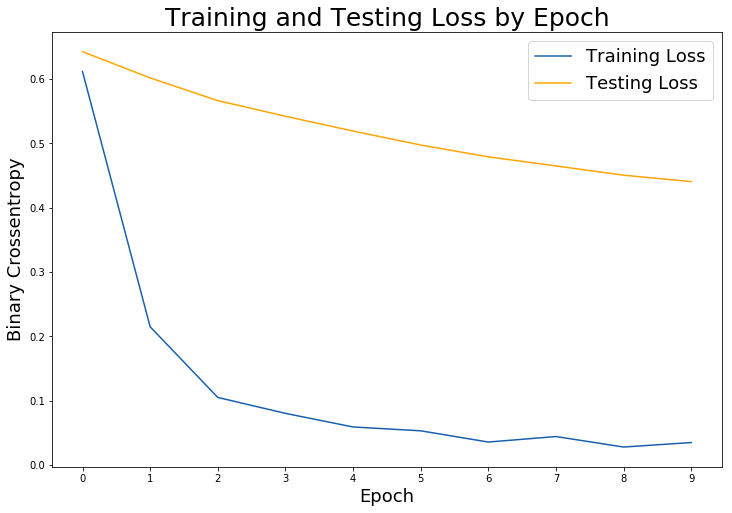

In [43]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks(range(10))

plt.legend(fontsize = 18);

In [44]:
#Testing 
metric = model.evaluate_generator(test_generator, steps=10, verbose=1)



labels = model.metrics_names


# Show model performance.
print(f'{labels[0]}: {metric[0]}')
print(f'{labels[1]}: {metric[1]}')

10/10 [==============================] - 15s 1s/step
loss: 0.4406939119100571
acc: 1.0


In [49]:
model.metrics_names[1]

'acc'

In [45]:
preds  = model.predict_generator(test_generator, steps=10, verbose=1)

10/10 [==============================] - 15s 1s/step


In [46]:
preds[0]

array([0.6503249, 0.6250074, 0.6492912, 0.6528501], dtype=float32)

In [32]:
preds

array([[0.7197881 , 0.72266984, 0.7386592 , 0.7493378 ],
       [0.7201949 , 0.7233882 , 0.73543596, 0.7489402 ],
       [0.71992403, 0.72208965, 0.7367119 , 0.7491838 ],
       ...,
       [0.7200471 , 0.7244565 , 0.7364509 , 0.7483691 ],
       [0.7211136 , 0.72337186, 0.7361222 , 0.749495  ],
       [0.71754515, 0.7213573 , 0.7352272 , 0.74740976]], dtype=float32)

In [34]:
test_generator.class_indices

{',': 0, '.': 1, '0': 2, '1': 3}

In [35]:
# https://stackoverflow.com/questions/50988050/cnn-training-accuracy-is-1-0-and-validation-accuracy-is-1-0-prediction-return


import numpy as np
from keras.preprocessing import image


test_image = image.load_img('/Users/patrickcavins/Downloads/imgsrv.fcgi.png', grayscale = True, target_size = (300, 300,1))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_generator.class_indices
if result[0][0] == 1:
    prediction = 'Yes'
else:
    prediction = 'No'
    
prediction

/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


'Yes'

In [ ]:
# batch normalization 
# add dropout 
# 